
<img src="tpan1.png">



*****

## Exercice 1:<h2>
>On considère le polynôme $p(x) = (x - 1)^6$. 
>
>En développant on
>peut écrire ce même polynôme sous la forme
>$f(x) = x^6 - 6x^5 + 15x^4 - 20x^3 + 15x^2 - 6x + 1.$
>
>1) Avec Matlab évaluer $p(x)$ et $f(x)$ pour $x$ allant de $.998$ à
>$1.002$ en choisissant des pas de $.0001$.
>
>2) Faire un graphique de $f(x)$ et $p(x)$. Commenter.

In [1]:
p=lambda x : (x-1)**6
f=lambda x : x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

In [2]:
import numpy as np
for i in np.arange(0.998, 1.002 ,0.001):
    print(" p(",i,") = ",p(i))
    print(" f(",i,") = ",f(i))  

 p( 0.998 ) =  6.400000000000034e-17
 f( 0.998 ) =  1.7763568394002505e-15
 p( 0.999 ) =  1.0000000000000053e-18
 f( 0.999 ) =  0.0
 p( 1.0 ) =  0.0
 f( 1.0 ) =  0.0
 p( 1.001 ) =  9.999999999993393e-19
 f( 1.001 ) =  -2.6645352591003757e-15
 p( 1.002 ) =  6.400000000000034e-17
 f( 1.002 ) =  1.7763568394002505e-15


#### 2) 

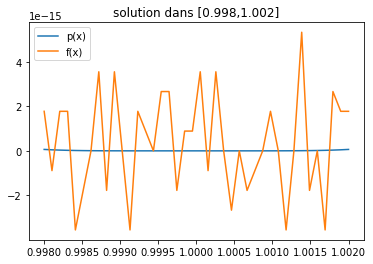

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
#Cf ,Cp = plt.subplots()
x=np.linspace(0.998,1.002,40)
plt.plot(x,p(x),label='p(x)')
plt.plot(x,f(x),label='f(x)')
plt.title('solution dans [0.998,1.002]')
plt.legend()
plt.show()

## Expliquer ces sources d'erreurs !!!!

In [4]:
######










# EXERCICE 2:

>On considère l'équation : $$ f(x)=x^3+x^2-3x-3=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[-2;2]$, puis trouver des intervalles convenables pour appliquer la méthode de >bisection.
>
>2) Utiliser un programme `dicho.m` qui permettra de trouver les solutions de l'équation $f(x)=0$ avec $eps=0.001$.
>
>3) Modifier le programme `dicho.m` pour qu'il donne le nombre d'itération nécessaire pour avoir la solution à $eps$ près.

## 1)

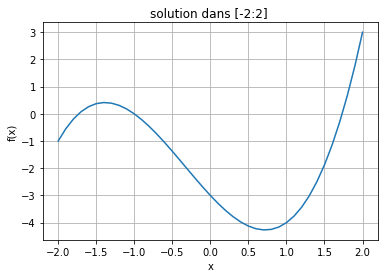

In [7]:
import matplotlib.pyplot as plt
from numpy import linspace
f=lambda x: x**3+x**2-3*x-3
T=linspace(-2,2,41)
plt.title("solution dans [-2:2] ");
plt.xlabel("x")
plt.ylabel ("f(x)")
plt.grid(True)
plt.plot(T,f(T))
plt.show()


# Daprés le graph de $f$ il existe 3 solutions :
- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

### 2)

In [8]:
def dicho(a,b,g,eps):
    '''version itérative '''
    m=(a+b)/2
    err=abs(b-a)
    while err>eps :
        if g(m)==0 :
            break
        elif g(a)*g(m)<0 :
            b=m
        else: a=m
        m=(a+b)/2
        err=abs(b-a)
    return m

In [9]:
x3=dicho(-2,-1.5,f,10)
x10=dicho(-2,-1.5,f,10)
x20=dicho(-2,-1.5,f,20)
print("x3= ",x3," x10= ",x10," x20= ",x20)

x3=  -1.75  x10=  -1.75  x20=  -1.75


In [10]:
print('f(x10)={},f(x20)={}'.format(f(x10),f(x20)))

f(x10)=-0.046875,f(x20)=-0.046875


In [11]:
def dichow(a,b,f,eps):
    """version tant que qui renvoila solution avec le nombre d'''itération """
    m=(a+b)/2
    err=abs(b-a)
    n=0
    while err>eps :
        n+=1
        if f(m)==0 :
            break
        elif f(a)*f(m)<0 :
            b=m
        else: a=m
        m=(a+b)/2
        err=abs(b-a)
    return m,n


- $\alpha_1 \in ]-2;-1.5[$ 
- $\alpha_2 \in ]-1.5;-0.5[$ 
- $\alpha_3 \in ]1.5;2[$ 

In [12]:
print ("α1= ",dichow(-2,-1.5,f,0.0001))
print ("α2= ",dichow(-1.5,-0.5,f,0.0001))
print ("α3= ",dichow(1.5,2,f,0.0001))

α1=  (-1.732025146484375, 13)
α2=  (-1.0, 1)
α3=  (1.732025146484375, 13)


## 3)

In [13]:
import numpy as np
a=-1.5
b=-0.5
p=8
dichow(a,b,f,10**(-p))

(-1.0, 1)

In [14]:
interval=[[-2,-1.5],[-1.5,-0.5],[1.5,2]]
for u in interval:
    print(dichow(u[0],u[1],f,10**(-3)))
################################################   
print(dichow(-2,-1.5,f,10**(-3)))
print(dichow(-1.5,-0.5,f,10**(-3)))
print(dichow(1.5,2,f,10**(-3)))


(-1.73193359375, 9)
(-1.0, 1)
(1.73193359375, 9)
(-1.73193359375, 9)
(-1.0, 1)
(1.73193359375, 9)


Le nombre d'itération N nécéssaire à la méthode de la dichotomie pour trouver $\alpha$ à $10^{-p}$ prés 

$$N \geq E\left(\dfrac{\ln(b-a)+p\ln(10)}{\ln(2)}\right)+1$$

In [15]:
import numpy as np
ND= lambda p: np.floor((np.log(b-a)+p*np.log(10))/np.log(2))+1


In [16]:
a=-2
b=-1.5
ND(5)

16.0

In [17]:
#alpha 1
print ("α1")
print ( "à 10^-5 : ",dichow(-2,-1.5,f,10**(-8)))
#à 10^-8
print ( "à 10^-8 : ",dichow(-2,-1.5,f,10**(-8)))

α1
à 10^-5 :  (-1.732050810009241, 26)
à 10^-8 :  (-1.732050810009241, 26)


In [18]:
#alpha 2
print ("α2")
print ( "à 10^-5 : ,",dichow(-1.51,-0.5,f,10**(-5)))
#à 10^-8
print ( "à 10^-8 : ,",dichow(-1.51,-0.5,f,10**(-8)))

α2
à 10^-5 : , (-1.0000028610229492, 17)
à 10^-8 : , (-0.9999999977275729, 27)


## Méthode graphique pour la recherche de la solution 

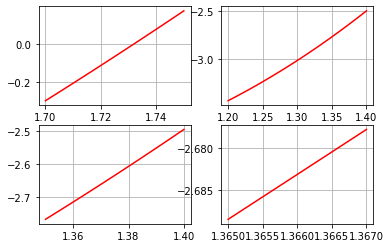

In [19]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+x**2-3*x-3

t=np.linspace(1.7,1.75,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)


# EXERCICE 3:
>On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
>1) Dessiner la courbe de $f$ dans l'intervalle $[1;2]$, puis trouver une valeur approché de la solution à 0.001 près (En >utilisant la fonction zoom du graphique).
>
>2) Vérifier que cette équation est équivalente aux 3 schéma du point fixe suivant:
>
>a) $g_1(x)=\frac{1}{2}\sqrt{10-x^3}=x$.
>
>b) $g_2(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.
>
>c) $g_3(x)=x-x^3-4x^2+10=x$.
>
>3) Ecrire puis appliquer  une fonction Matlab que l'on appellera  `pointfixe.m` aux trois schémas précédents en prenant >`x0=1.5;eps=0.001`.
>
>4) Quelle est la fonction (parmi $g_1, g_2$ et $g_3$) qui donne la convergence la plus rapide?
>

### Correction <h3>

#### 1)<h4>

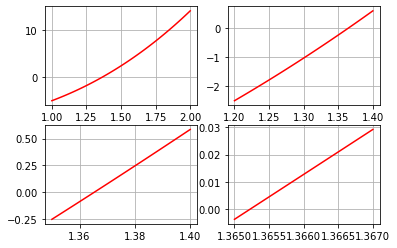

In [20]:
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import numpy as np 
import matplotlib.pyplot as plt

f=lambda x:x**3+4*x**2-10

t=np.linspace(1,2,100)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.2,1.4,100)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r')
plt.grid(True)
##########################################
t=np.linspace(1.35,1.4,100)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r')
plt.grid(True)
#########################################
t=np.linspace(1.365,1.367,100)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r')
plt.grid(True)


#### 2) Justification théorique pour la fonction g1

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

a) $g(x)=\frac{1}{2}\sqrt{10-x^3}=x$.

 $$x^3+4x^2-10=0$$ 
    
 $$4x^2=10-x^3$$
 
 $$2x=\sqrt{10-x^3}$$
 
 $$x=\frac{1}{2}\sqrt{10-x^3}$$
 
Donc $ f(x)=g(x)$

## Calcul symbolique de la dérivée

In [30]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g1=lambda x: 1/2*sqrt(10-x**3)


In [31]:
dg1=lambdify(x,diff(g1(x),x,1))
dg1(1.365)

### Que pouvez vous conclure à propos des convergences de g1

## Justification théoriques pour g2 et g3

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$

b) $g(x)=\sqrt{\displaystyle\frac{10}{4+x}}=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2=10$$
$$x^2(x+4)=10$$
$$x^2=\frac{10}{x+4}$$
$$x=\sqrt{\displaystyle\frac{10}{4+x}}$$
Donc $ f(x)=g(x)$

On considère l'équation : $$ f(x)=x^3+4x^2-10=0$$
c) $g(x)=x-x^3-4x^2+10=x$.

$$x^3+4x^2-10=0$$
$$x^3+4x^2-10+x-x=0$$
$$x^3-4x^2+x-x=10$$
$$x^3-4x^2+x=x+10$$
$$4x^2+x=x-x^3+10$$
$$x=x-x^3-4x^2+10$$
Donc $ f(x)=g(x)$

## Etudier théoriquement la convergences de g2 et g3

In [32]:
from sympy import *
import numpy as np
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
g2=lambda x: sqrt(10 /(4+x))
g3= lambda x: x-x**3-4*x**2+10

In [34]:
dg2=lambdify(x,diff(g2(x),x,1))
dg2(1.365)

In [35]:
dg3=lambdify(x,diff(g3(x),x,1))
dg3(1.365)

#### 4)<h4>

### Donner la solution avec un codepython 


In [12]:
f=lambda x:  x**3+4*x**2-10 # la fonction f
g1=lambda x: 1/2*sqrt(10-x**3)
g2=lambda x: sqrt(10/(x+4))
g3=lambda x: x-x**3-4*x**2 + 10


def ptfixe(g,x0,eps,nmax):
    zero=x0;
    for i in range(1,nmax):
        x=zero;
        zero=g(x);
        erreur=abs(zero-x);
        if erreur<eps : 
            return i
    print('pas de convergence avec le nombre d''iteration indique')



In [ ]:
ptfixe(g3,1.5,0.0001,30)

### quelle est la fonction qui donne la convergence la plus rapide ??

Donner le nombre d'itération pour chaque méthode convergent e
+ $g_2$ donne le resultat en ? itérations 
+ $g_1$ donne le resultat en ?
+ $g_3$ est - elle convergente?

In [42]:
ptfixe(g1,1,0.001,30)

In [43]:
ptfixe(g2,1,0.001,30)

In [ ]:
ptfixe(g3,1,0.001,30)

# EXERCICE 4:
>1) On considère la fonction $f(x)=e^{-x}-x$. Ecrire puis appliquer  une fonction Matlab que l'on appellera `newton.m` à la >fonction $f$, en prenant $x0=0$, $eps=0.001$ .
>
>2) Montrer que l'équation $f(x)=0$ admet une solution unique que l'on peut obtenir en utilisant la méthode de Newton à partir >de $x0=1$.

1)

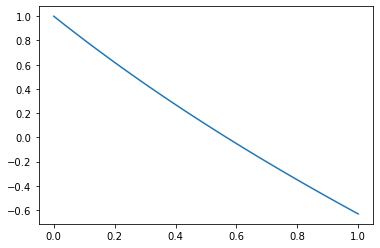

sol=  0.5671431650348622


In [6]:
import numpy as np
import matplotlib.pyplot as plt
def newton(a,eps):
    x1=a
    x2=x1-f(x1)/fprime(x1)
    while abs(x1-x2)>eps :
        x1=x2
        x2=x1-f(x1)/fprime(x1)
    sol=x2
    return (sol)
f=lambda x: np.exp(-x)-x
fprime= lambda x: -np.exp(-x)-1
t=np.linspace(0,1,100);
plt.plot(t,f(t))
plt.show()
print ("sol= ",newton(0,0.001))

2)

In [8]:
print('sol = ',newton(1,0.001))

sol =  0.567143285989123
